# 260320 Análisis de sentimientos de Twitter para la ciencia de datos usando Python

#### Twitter Sentiment Analysis for Data Science Using Python

http://aiforwomen.org/twitter-sentiment-analysis-for-data-science-using-python/

A principios de 2019, se dice que Twitter tiene alrededor de 126 millones de usuarios diarios. Esto significa que, al analizar los Tweets de todos estos usuarios sobre un tema en particular, podemos determinar la opinión general promedio de las personas sobre ese tema.

Por ejemplo, durante la temporada de elecciones, al estudiar los Tweets de personas sobre un partido o candidato en particular, podemos predecir el posible resultado de la elección. Esto se puede hacer a través de algo llamado "Análisis de sentimientos".

In [10]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

In [12]:
consumer_key='koO4XqTuWFr5ADGcE8kjIkVoU'
consumer_secret='3F4sk9qU8zbKBROuLPUUj1uvE2YuhseXPe0ahMQoivg4icN5bL'
access_token='1230251564616515586-2KqPsCG2mIJp3irRjENgHpCfQUxTUg'
access_token_secret='6PJfMtYGY7w6csiIX9m1S5jFEKNZ3hE9PVkHKeN1S14iM'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [13]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [14]:
word = input("Enter the word here: ")

Enter the word here: coronavirus


In [15]:
filtered='word -filter:retweets'


tweets = tweepy.Cursor(api.search,
              q=filtered,
              lang="en").items(100)

tweets

In [16]:
cleantweets = [remove_url(tweet.text) for tweet in tweets]

In [17]:
sentiment_objects = [TextBlob(tweet) for tweet in cleantweets]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("JamesMelville check An open source initiative by university hospital in NL in the push t"))

In [18]:
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

sentiment_values[0:99]

[[0.0,
  'JamesMelville check An open source initiative by university hospital in NL in the push t'],
 [-0.15625,
  'MeghanMcCain Didnt you mean to use the word probably instead of definitely'],
 [0.0,
  'sageboggs TheRealTriscuit I just looked it up and triticum is the Latin for wheat so I wasnt totally off in m'],
 [0.3666666666666667,
  'bright having a 7000 word speech on why same sex marriage and the legality of it is important whether whatever it m'],
 [0.0,
  'I think My mums sisters daughter is Bipolar and Im using the word Bipolar because I dont want to use possessed'],
 [0.0,
  'davidpe11188501 Then how do you explain my utterly unsourced and definitely probably not made up conversation in'],
 [0.0, 'Word Stacks March 4 2020 Daily Puzzle Answers'],
 [0.5,
  'I want to know WHO voted on thisHow many votedThe word unanamous gives us no roll countVery suspiciousWho'],
 [-0.03571428571428571,
  'The Germans renowned for using a single word where a simple sentence would suffice wo

In [19]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

,polarity,tweet
0,0.000000,JamesMelville check An open source initiative ...
1,-0.156250,MeghanMcCain Didnt you mean to use the word pr...
2,0.000000,sageboggs TheRealTriscuit I just looked it up ...
3,0.366667,bright having a 7000 word speech on why same s...
4,0.000000,I think My mums sisters daughter is Bipolar an...
...,...,...
95,0.000000,sayyeshaa One word about Thalapathy AskSayyeshaa
96,0.000000,algo me dice q hawks m word
97,-0.126061,gtconway3d Its dangerous misinformation Ill sa...
98,0.000000,The G WordMotherland MotherlandFortSalem Raylla


In [20]:
n=sentiment_df["polarity"]

m=pd.Series(n)

m

0     0.000000
1    -0.156250
2     0.000000
3     0.366667
4     0.000000
        ...   
95    0.000000
96    0.000000
97   -0.126061
98    0.000000
99    1.000000
Name: polarity, Length: 100, dtype: float64

In [21]:
pos=0
neg=0
neu=0

In [22]:
for items in m:
    if items>0:
        print("Positive")
        pos=pos+1
    elif items<0:
        print("Negative")
        neg=neg+1
    else:
        print("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

Neutral
Negative
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Negative
Neutral
Positive
Neutral
Neutral
Positive
Positive
Positive
Positive
Neutral
Positive
Positive
Neutral
Neutral
Neutral
Positive
Neutral
Positive
Positive
Positive
Positive
Negative
Positive
Neutral
Negative
Negative
Neutral
Positive
Neutral
Negative
Positive
Positive
Positive
Neutral
Positive
Positive
Neutral
Neutral
Neutral
Negative
Neutral
Negative
Positive
Neutral
Neutral
Positive
Positive
Neutral
Neutral
Positive
Neutral
Negative
Positive
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Neutral
Positive
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Negative
Neutral
Neutral
Neutral
Positive
Positive
Positive
Neutral
Neutral
Positive
Negative
Negative
Neutral
Negative
Neutral
Neutral
Positive
Neutral
Neutral
Negative
Neutral
Positive
36 16 48


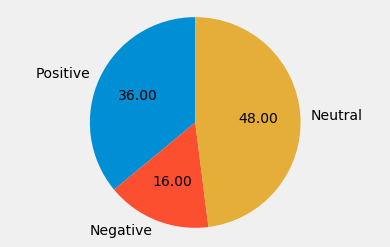

In [23]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

In [24]:
print("%f percent twitter users feel positive about %s"%(pos,word))

print("%f percent twitter users feel negative about %s"%(neg,word))

print("%f percent twitter users feel neutral about %s"%(neu,word))

36.000000 percent twitter users feel positive about coronavirus
16.000000 percent twitter users feel negative about coronavirus
48.000000 percent twitter users feel neutral about coronavirus


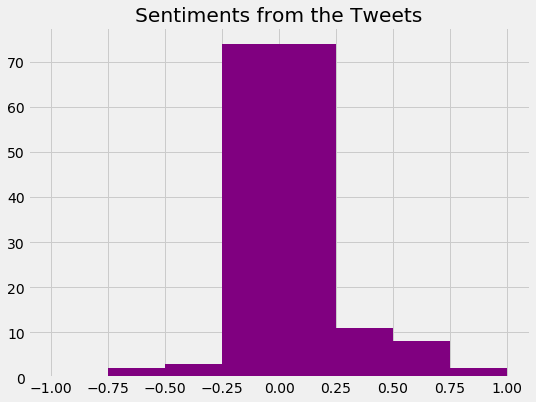

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from the Tweets")
plt.show()

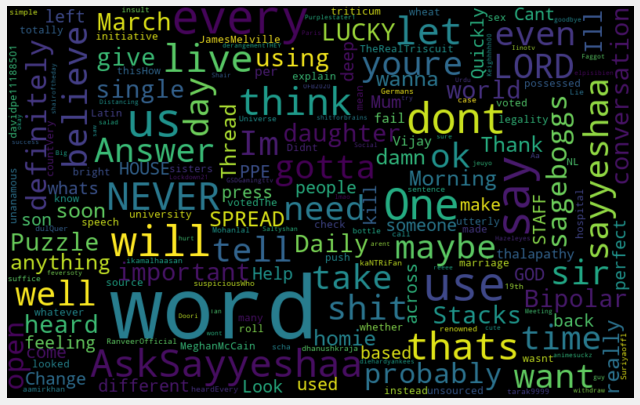

In [26]:
all_words = ' '.join([text for text in cleantweets])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()